# Solution analysis

Here I analyze the performance of the ring. Mostly its resistance to imperfections, and quantify its sensitivity

In [1]:
from helper_tools import *
from latticeElements.utilities import ElementTooShortError
from latticeModels import make_ring_and_injector, RingGeometryError, InjectorGeometryError
from latticeModels_Parameters import optimizerBounds_V1_3,injectorParamsOptimalAny,ringParamsOptimal_V3
from storageRingModeler import StorageRingModel,make_optimal_solution_model



model=make_optimal_solution_model()

In [28]:
# model.T=10.0
model.swarm_injector_initial=model.generate_swarm(10_000)
# swarm_traced=model.inject_swarm(parallel=True)

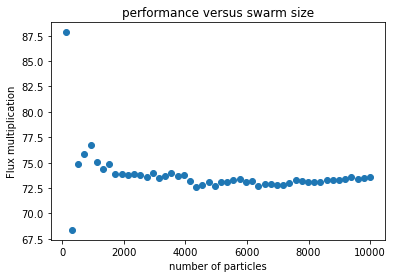

In [36]:
from particle_class import Swarm
%matplotlib inline
number_of_particles=np.linspace(100,swarm_traced.num_particles()).astype(int)
fluxes=[]
for num in number_of_particles:
    swarm=Swarm()
    swarm.particles=swarm_traced.particles[:num]
    fluxes.append(swarm.weighted_flux_mult()*number_of_particles.max()/model.swarm_injector_initial.num_particles())

scaleUp=model.swarm_injector_initial.num_particles()/number_of_particles.max() #scale up number of particles
#cause ones clipped in injector are not included
plt.scatter(number_of_particles*scaleUp,fluxes)
plt.title("performance versus swarm size")
plt.xlabel("number of particles")
plt.ylabel('Flux multiplication')
plt.show()

In [5]:
model.compute_Flux_Multiplication()

In [11]:
from latticeElements.utilities import  halbach_magnet_width
halbach_magnet_width(.007596,magnetSeparation=0.0)

0.004070684131413616

In [13]:
A=[1,2]
B=['a','b','c']
for a in A:
    for b in B:
        print(a,b)

1 a
1 b
1 c
2 a
2 b
2 c


In [14]:
import itertools
for a,b in itertools.product(A,B):
    print(a,b)

1 a
1 b
1 c
2 a
2 b
2 c
